In [1]:
import pandas as pd 
from openpyxl import load_workbook

from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用 SimHei 字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [2]:
# 指定文件路径
file_path = "data.xlsx"

# 读取数据集
data = pd.read_excel(file_path, sheet_name='Sheet1')

print(data.shape)
# print(data.dtypes)

# 取指定行数据 (确定tumer type的病例)
data = data[:300]
# data.tail()


(473, 77)


In [3]:
# 将日期列转换为 datetime 类型
# data['date_column'] = pd.to_datetime(data['ICI starting time'])

# # 治疗开始是最早日期
# min_date = data['date_column'].min()
# # max_date = data['date_column'].max()
# print("最早日期:", min_date)
# # print("最晚日期:", max_date)


# 结局日期


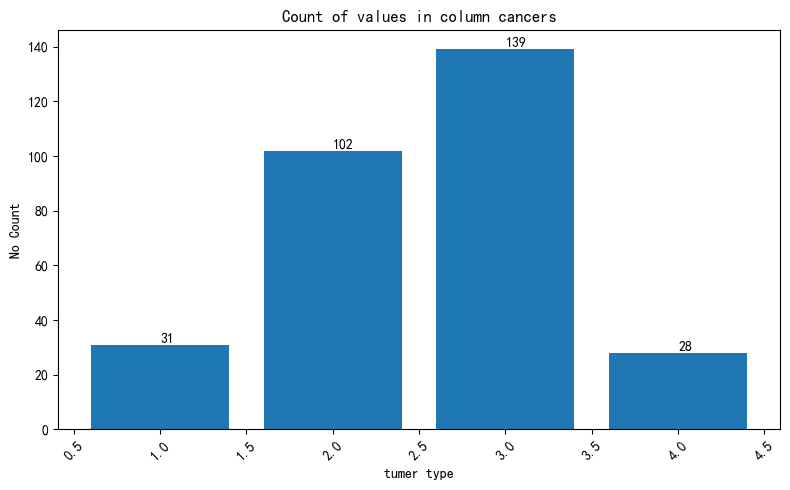

In [3]:
# count_cancers = data['tumer type'].value_counts()
count_cancers = data['tumer type(1=小，2=鳞，3=腺，4=其他)'].value_counts()
# print("Count of values in column 'Cancers':\n", count_cancers)

# 绘制柱状图
# 设置图像尺寸
plt.figure(figsize=(8, 5))
bars = plt.bar(count_cancers.index, count_cancers.values)
plt.xlabel('tumer type')
plt.ylabel('No Count')
plt.title('Count of values in column cancers')
plt.xticks(rotation=45)  # 旋转标签

# 在每个柱形的顶部显示对应的 Y 值
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')
    
plt.tight_layout()  # 调整布局，防止标签被截断
plt.show()

In [5]:
# 匹配具有影像数据的病例
# # 指定文件路径
# file_path = "lung_cancer_1.xlsx"

# # 读取数据集 
# data = pd.read_excel(file_path, sheet_name='Sheet1')
# case_ID = data['Patient'].values
# case_index = []
# for ID in case_ID:
#     ID = ID[4:-4]
#     case_index.append(int(ID))
# # 获取指定行
# matched_cases = data.iloc[case_index]

In [4]:
# 区分肿瘤类型：小细胞癌 和 非小细胞癌
data_sclc = data[data['tumer type(1=小，2=鳞，3=腺，4=其他)'] == 1]  # 类型为1的行
data_nsclc = data[data['tumer type(1=小，2=鳞，3=腺，4=其他)'].isin([2, 3, 4])] # 类型为2、3、4的行

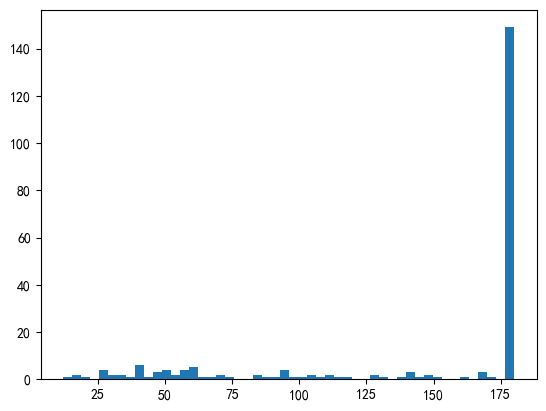

In [5]:
# 绘制生存时间的直方图，观察生存时间分布
T = data["综合结局发生的时间"]
plt.hist(T, bins = 50)
plt.show()

In [9]:
# 定义一个函数，用于将小于 180 的值转换为 True，等于 180 的值转换为 False
def format_values(x):
    if x < 180:
        return True
    else:
        return False 

# 对 DataFrame 中的 '综合结局发生的时间' 列应用上述函数
# data['outcome_1'] = data['综合结局发生的时间'].apply(format_values)

# 删除包含空值的行
data = data.dropna(subset=['综合结局发生的时间'])

# 显示转换后的 DataFrame
# data.head()

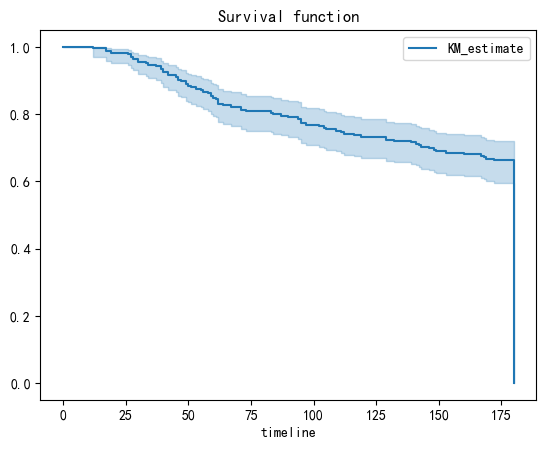

180.0

In [12]:
# 使用Kaplan-Meier模型估计生存函数
T = data['综合结局发生的时间']
kmf = KaplanMeierFitter()
kmf.fit(durations=T, event_observed=data['综合结局(PFS)'])
kmf.plot_survival_function()
plt.title('Survival function')
plt.show()
# 计算中位生存时间
kmf.median_survival_time_

Text(0.5, 1.0, 'Survival of different gender groups')

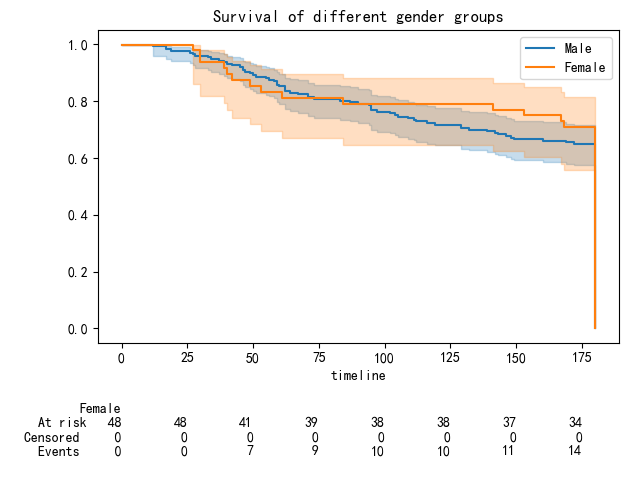

In [43]:
ax = plt.subplot(111)

# 根据性别分组
grouped = data.groupby('Gender(male=1,female=2)')
# 分别获取两组数据
group1 = grouped.get_group(1)
group2 = grouped.get_group(2)

kmf.fit(durations=group1['综合结局发生的时间'], event_observed=group1['综合结局(PFS)'], label="Male")
kmf.plot_survival_function(ax=ax)
kmf.fit(durations=group2['综合结局发生的时间'], event_observed=group2['综合结局(PFS)'], label="Female")
kmf.plot_survival_function(ax=ax, at_risk_counts=True)
plt.title('Survival of different gender groups')

Text(0.5, 1.0, 'Survival of different cancer types')

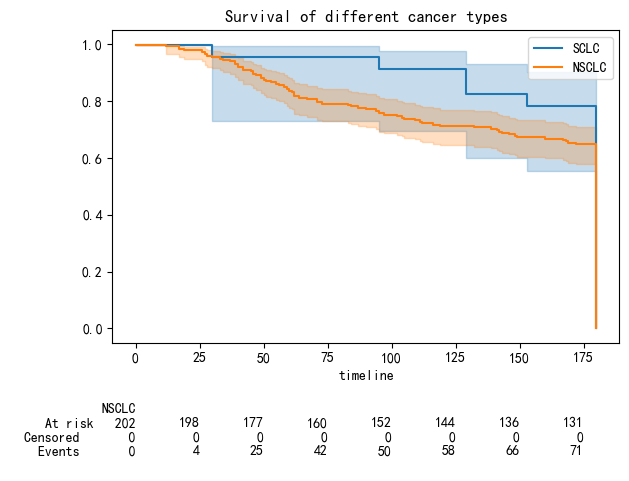

In [44]:
ax = plt.subplot(111)
# 分为小细胞肺癌和非小细胞肺癌两组
grouped = data.groupby('tumer type(1=小，2=鳞，3=腺，4=其他)')

cancer_group1 = data[data['tumer type(1=小，2=鳞，3=腺，4=其他)'] == 1]  # 选择癌症类型为1的行
cancer_group2 = data[data['tumer type(1=小，2=鳞，3=腺，4=其他)'] != 1]  # 选择癌症类型非1的行

kmf.fit(durations=cancer_group1['综合结局发生的时间'], event_observed=cancer_group1['综合结局(PFS)'], label="SCLC")
kmf.plot_survival_function(ax=ax)
kmf.fit(durations=cancer_group2['综合结局发生的时间'], event_observed=cancer_group2['综合结局(PFS)'], label="NSCLC")
kmf.plot_survival_function(ax=ax, at_risk_counts=True)

plt.title('Survival of different cancer types')


In [ ]:
# 按XX特征评分生存函数

ecog_types = data.sort_values(by=['ph.ecog'])['ph.ecog'].unique()
for i, ecog_type in enumerate(ecog_types):
    ax = plt.subplot(2, 2, i + 1)
    ix = data['ph.ecog'] == ecog_type
    kmf.fit(T[ix], E[ix], label=str(ecog_type))
    kmf.plot_survival_function(ax=ax)
    plt.title(f'ECOG {ecog_type}')
plt.tight_layout()

In [28]:
# 免疫检查点抑制剂全部属于PD-1
count_adverse = data['types of concurrent immune-related adverse events'].value_counts()
print("Count of values in column 'count_adverse':\n", count_adverse)


Count of values in column 'count_adverse':
 甲减                              12
免疫性肺炎                            7
免疫性皮炎                            5
间质性肺炎                            5
免疫相关性肺炎                          3
皮肤血管瘤                            3
甲亢                               2
免疫性肠炎                            2
免疫性肝炎                            1
2                                1
反应性毛细血管增多症。      免疫相关性甲减         1
免疫性皮炎。 甲减                        1
2021-01-21 00:00:00              1
免疫性肌炎                            1
免疫相关性甲减。 免疫性胰腺炎                  1
心肌损伤                             1
免疫相关性皮炎                          1
免疫相关性重症肌无力，肝损，心肌损害   免疫相关性皮疹     1
甲功减低                             1
免疫相关血液系统疾病。 血小板降低                1
免疫性皮损                            1
免疫性肺炎;免疫性皮皮疹                     1
甲状腺功能减退                          1
皮炎                               1
Name: types of concurrent immune-related adverse events, dtype: int64
